### 1. Use the csv/xls file assigned to you, and Report correlation of all input features with the output variable (Y). If features are more than one, report the features correlated at a cutoff of 0.6.

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('country1.csv')

# Assuming "Corruption_Index" is the output variable (Y)
Y = df["Gini_Index"]

# Calculate the correlation between "Gini_Index" and "Corruption_Index"
correlation = df["Corruption_Index"].corr(Y)

print("Correlation between Corruption_Index and Gini_Index : ", correlation)

Correlation between Corruption_Index and Gini_Index :  0.9088564679448649


### 2. Now Use the feature with the highestcorrelation as X, and build the Simple Linear regression (SLR) model for X vs Y. Display it’s coefficients, R-square value, and check its significance for alpha=0.1

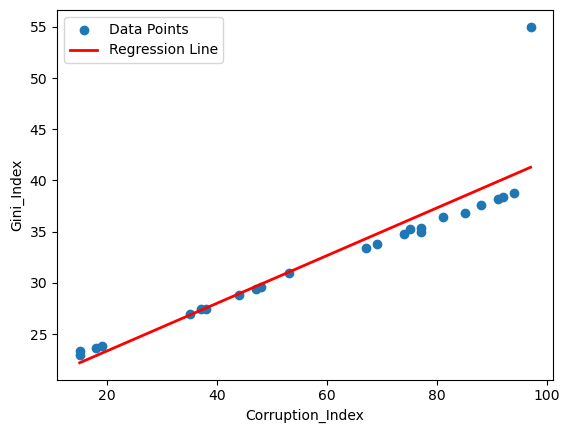

summary of the linear regression model is : 
                             OLS Regression Results                            
Dep. Variable:             Gini_Index   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     95.66
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           1.80e-09
Time:                        11:54:16   Log-Likelihood:                -60.355
No. Observations:                  24   AIC:                             124.7
Df Residuals:                      22   BIC:                             127.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [76]:
# Define the independent variable (X) and dependent variable (Y)
X = df["Corruption_Index"]
Y = df["Gini_Index"]

X = sm.add_constant(X)

# dividing in training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit the Simple Linear Regression model
model = sm.OLS(Y_train, X_train).fit()

# Plot the data points
plt.scatter(X_train["Corruption_Index"], Y_train, label="Data Points")

# Plot the regression line
#X_graph = pd.DataFrame({'Corruption_Index': np.linspace(X_train["Corruption_Index"].min(), X_train["Corruption_Index"].max(), 100)})
X_graph = sm.add_constant(X_graph)
Y_graph = model.predict(X_graph)
plt.plot(X_graph["Corruption_Index"], Y_graph, color='red', linewidth=2, label="Regression Line")

# Add labels and a legend
plt.xlabel("Corruption_Index")
plt.ylabel("Gini_Index")
plt.legend()

# Display the plot
plt.show()


print("summary of the linear regression model is : \n", model.summary())
# Check the significance of the coefficient for alpha = 0.1
alpha = 0.1
p_value = model.pvalues["Corruption_Index"]
if p_value < alpha:
    print(f"\n\nCorruption_index is significant (p-value = {p_value:.4f} < {alpha})")
else:
    print(f"\n\nCorruption_Index is not significant (p-value = {p_value:.4f} >= {alpha})")

### 3.

In [77]:

# Predict the output over the test data
Y_pred = model.predict(X_test)

# Create a DataFrame to display actual and predicted values
results_df = pd.DataFrame({
    "Actual Gini_Index": Y_test,
    "Predicted Gini_Index": Y_pred
})

# Display the DataFrame with actual and predicted values
print("\nActual vs. Predicted Values:")
print(results_df)

# Compute R-squared (R²) and Mean Squared Error (MSE)
r_squared = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

# Display the results
print(f"\n\nR-squared (R²): {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


Actual vs. Predicted Values:
    Actual Gini_Index  Predicted Gini_Index
27               31.4             31.973829
15               32.4             33.137660
23               39.8             41.750008
17               27.2             27.085740
8                37.2             37.792983
9                36.8             38.258515


R-squared (R²): 0.9331
Mean Squared Error (MSE): 1.1947


### 4.

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('country1.csv')

X2 = df["Corruption_Index"]
Y2 = df["Gini_Index"]

X2 = sm.add_constant(X2)

model2 = sm.OLS(Y2, X2).fit()

print(X2["Corruption_Index"], Y2)

# Calculate residuals and standardized residuals (Z-score)
residuals = model2.resid
std_residuals = model2.get_influence().resid_studentized_internal

# Calculate Cook's distance
influence = model2.get_influence()
cook_distance = influence.cooks_distance[0]

# Calculate leverage values
leverage = influence.hat_matrix_diag

# Set a threshold for outlier detection
z_score_threshold = 3  # You can adjust this threshold as needed
cook_threshold = 1  # Suggested threshold for Cook's distance
leverage_threshold = 2 * (len(df.columns) + 1) / len(df)

# Detect outliers using Z-score, Cook's distance, and leverage
z_score_outliers = np.where(np.abs(std_residuals) > z_score_threshold)[0]
cook_outliers = np.where(cook_distance > cook_threshold)[0]
leverage_outliers = np.where(leverage >  leverage_threshold)[0]

# Display the detected outliers
print("Outliers detected by Z-score:", z_score_outliers)
print("Outliers detected by Cook's distance:", cook_outliers)
print("Outliers detected by leverage:", leverage_outliers)

# Analyze whether the outliers detected by different methods are the same or not
common_outliers = set(z_score_outliers)  & set(cook_outliers)

print("outlier data is : \n", X2.iloc[z_score_outliers], Y2.iloc[z_score_outliers].values)

if len(common_outliers) > 0:
    print("Common outliers detected by all methods:", common_outliers)
else:
    print("No common outliers detected by all methods.")

0     77
1     53
2     15
3     47
4     38
5     75
6     85
7     81
8     82
9     84
10    88
11    91
12    69
13    74
14    97
15    62
16    48
17    36
18    44
19    35
20    18
21    92
22    19
23    99
24    15
25    94
26    67
27    57
28    77
29    37
Name: Corruption_Index, dtype: int64 0     35.0
1     31.0
2     23.3
3     29.4
4     27.4
5     35.3
6     36.8
7     36.4
8     37.2
9     36.8
10    37.6
11    38.2
12    33.8
13    34.8
14    55.0
15    32.4
16    29.6
17    27.2
18    28.8
19    27.0
20    23.6
21    38.4
22    23.8
23    39.8
24    23.0
25    38.8
26    33.4
27    31.4
28    35.4
29    27.4
Name: Gini_Index, dtype: float64
Outliers detected by Z-score: [14]
Outliers detected by Cook's distance: [14]
Outliers detected by leverage: []
outlier data is : 
     const  Corruption_Index
14    1.0                97 [55.]
Common outliers detected by all methods: {14}
